<a href="https://colab.research.google.com/github/danielsineus/Financial-Analysis/blob/master/Paper_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 PAPER CHALLENGE

The objective of this paper challenge is to explore the extent to which that the stock market in the United States was affected by the COVID-19.

The Steps to undertake to get our results is to estimate the expected returns and the average of Covid Cases.

Set up a multiple OLS regression to estimate the coefficients of the parameters.

See to what extent the market sentiments are affected the COVID sentiments.


^SPSIRE : S&P RETIAL SELECT INDEX

^SPSIBK : S&P BANK SELECT INDUSTRY INDEX

^SPSIRBK : S&P REGIONAL BANKS SELCT INDUSTRY

^SPSIBI : S&P BIOTECHNOLOGY SELECT INSDUTRY

^SPSITE : S&P TELECOM SELECT INDEX

^SPSIHP : S&P HEALTH CARE SERVICE

^SPSIOP : S&P OIL AND GAS EXPLORATION



In [ ]:
#!pip install --upgrade yfinance

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# download yahoo finance

import yfinance as yf
stocks=["GOOGL", "MSF", "VUG", "BABA", "AMZN", "SPX"]
down=yf.download(stocks, start="2015-01-01", end="2023-03-30", period="1mo", interval="3mo")
down["Adj Close"].head()

[*********************100%***********************]  6 of 6 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSF']: Exception('%ticker%: No timezone found, symbol may be delisted')


,AMZN,BABA,GOOGL,MSF,SPX,VUG
Date,,,,,,
2015-01-01 00:00:00,18.605000,83.239998,27.735001,NaN,0.01100,96.043633
2015-04-01 00:00:00,21.704500,82.269997,27.002001,NaN,0.00433,98.582657
2015-07-01 00:00:00,25.594500,58.970001,31.918501,NaN,0.01500,92.607452
2015-10-01 00:00:00,33.794498,81.269997,38.900501,NaN,0.00500,98.569267
2016-01-01 00:00:00,29.681999,79.029999,38.145000,NaN,0.01000,99.001915


In [ ]:

# Define a dictionary with ETF tickers, names, and sectors
etf_data = {
    'XLK': {'Name': 'SPDR', 'Sector': 'Technology'},
    'VGT': {'Name': 'Vanguard', 'Sector': 'Technology'},
    'IYW': {'Name': 'Ishare', 'Sector': 'Technology'},
    'VFH': {'Name': 'Vanguard', 'Sector': 'Financials'},
    "XLF": {"Name": "SPDR", "Sector": "Financials"},
    "IYF": {"Name": "Ishare", "Sector": "Financials"},
    "XLY": {"Name": "SPDR", "Sector": "Healthcare"},
    "VHI": {"Name": "Vanguard", "Sector": "Healthcare"},
    "IYH": {"Name": "Ishare", "Sector": "Healthcare"},
    "IYF": {"Name": "Ishare", "Sector": "Financials"},
    "XLY": {"Name": "SPDR", "Sector": "Consumer Discretionary"},
    "VCR": {"Name": "Vanguard", "Sector": "Consumer Discretionary"},
    "IYC": {"Name": "Ishare", "Sector": "Consumer Discretionary"},
    "XLP": {"Name": "SPDR", "Sector": "Consumer Staples"},
    "VDC": {"Name": "Vanguard", "Sector": "Consumer Staples"},
    "IYK": {"Name": "Ishare", "Sector": "Consumer Staples"},
    "XLE": {"Name": "SPDR", "Sector": "Energy"},
    "VDE": {"Name": "Vanguard", "Sector": "Energy"},
    "IYE": {"Name": "Ishare", "Sector": "Energy"},
    "XLI": {"Name": "SPDR", "Sector": "Industrial"},
    "VIS": {"Name": "Vanguard", "Sector": "Industrial"},
    "IYJ": {"Name": "Ishare", "Sector": "Industrial"},
    "XLB": {"Name": "SPDR", "Sector": "Materials"},
    "VAW": {"Name": "Vanguard", "Sector": "Materials"},
    "IYM": {"Name": "Ishare", "Sector": "Materials"},
    "XLRE": {"Name": "SPDR", "Sector": "Real Estate"},
    "VNQ": {"Name": "Vanguard", "Sector": "Real Estate"},
    "IYR": {"Name": "Ishare", "Sector": "Real Estate"},
    "XLU": {"Name": "SPDR", "Sector": "Utilities"},
    "VPU": {"Name": "Vanguard", "Sector": "Utilities"},
    "IDU": {"Name": "Ishare", "Sector": "Utilities"},
  "^GSPC": {"Name": "Market", "Sector":"S&P500 market"},
  "^FVX": {"Name": "Market", "Sector":"Bonds"}
    # Add more tickers, names, and sectors as needed
}

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each ETF ticker, name, and sector
for ticker, data in etf_data.items():
    try:
        # Retrieve the historical data for the ETF
        data_df = yf.download(ticker, start='2016-01-01', end='2023-06-25', period="1mo", interval="1mo")

        # Add columns for ETF ticker, name, and sector
        data_df['Ticker'] = ticker
        data_df['Name'] = data['Name']
        data_df['Sector'] = data['Sector']

        # Append the data to the combined DataFrame
        combined_data = combined_data.append(data_df)
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")

# Print the combined data
print(combined_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)
<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2016-01-01  42.060001  42.500000  38.029999  41.240002  37.493603  340881700   
2016-02-01  41.070000  41.639999  38.250000  40.970001  37.248123  293589600   
2016-03-01  41.320000  44.669998  41.259998  44.360001  40.330177  228773000   
2016-04-01  44.049999  44.730000  41.820000  42.130001  38.496384  207864500   
2016-05-01  42.220001  44.250000  41.759998  44.189999  40.378712  204116700   

           Ticker  Name      Sector  
Date                                 
2016-01-01    XLK  SPDR  Technology  
2016-02-01    XLK  SPDR  Technology  
2016-03-01    XLK  SPDR  Technology  
2016-04-01    XLK  SPDR  Technology  
2016-05-01    XLK  SPDR  Technology  


<ipython-input-19-c1df258ff953>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_df)


In [ ]:
# Save the combined data as a CSV file
combined_data.to_csv('etf_data.csv', index=True)

In [ ]:
data=pd.read_csv("etf_data.csv", index_col="Date", parse_dates=True)
data=data.iloc[:, 4:]
data.head()

,Adj Close,Volume,Ticker,Name,Sector
Date,,,,,
2016-01-01,37.493603,340881700,XLK,SPDR,Technology
2016-02-01,37.248123,293589600,XLK,SPDR,Technology
2016-03-01,40.330177,228773000,XLK,SPDR,Technology
2016-04-01,38.496384,207864500,XLK,SPDR,Technology
2016-05-01,40.378712,204116700,XLK,SPDR,Technology


In [ ]:
# check the summary statistics of the data
data.groupby("Ticker")["Adj Close"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
IDU,90.0,67.18,12.13,45.98,56.59,67.41,78.38,89.22
IYC,90.0,53.84,14.19,32.21,42.26,52.85,64.42,83.15
IYE,90.0,29.63,7.71,13.35,25.88,29.00,33.00,47.90
IYF,90.0,59.61,13.74,34.69,50.49,56.04,72.18,86.56
IYH,90.0,204.11,53.29,124.19,160.88,188.53,263.95,294.70
IYJ,90.0,78.20,18.90,44.15,64.94,74.25,96.07,112.28
IYK,90.0,135.96,38.76,90.63,105.89,114.99,175.22,206.04
IYM,90.0,97.13,23.01,55.54,80.22,89.93,120.07,145.35
IYR,90.0,77.89,13.06,56.44,67.14,76.32,85.93,110.72


In [ ]:
data.groupby(["Sector", "Name", "Ticker"])["Adj Close"].describe()

count         mean         std  \
Sector                 Name     Ticker                                   
Bonds                  Market   ^FVX     90.0     1.889044    1.064128   
Consumer Discretionary Ishare   IYC      90.0    53.842896   14.186674   
                       SPDR     XLY      90.0   121.643839   36.644185   
                       Vanguard VCR      90.0   195.835315   67.831755   
Consumer Staples       Ishare   IYK      90.0   135.958516   38.758111   
                       SPDR     XLP      90.0    56.151456   11.091331   
                       Vanguard VDC      90.0   145.375431   28.694515   
Energy                 Ishare   IYE      90.0    29.628361    7.707953   
                       SPDR     XLE      90.0    53.289212   14.734817   
                       Vanguard VDE      90.0    75.344495   20.704462   
Financials             Ishare   IYF      90.0    59.612871   13.743333   
                       SPDR     XLF      90.0    26.468306    6.447424   
                       Vanguard VFH      90.0    65.198629   15.407141   
Healthcare             Ishare   IYH      90.0   204.106615   53.292943   
                       Vanguard VHI      90.0    28.008371   15.502736   
Industrial             Ishare   IYJ      90.0    78.195224   18.895689   
                       SPDR     XLI      90.0    74.975837   17.352350   
                       Vanguard VIS      90.0   142.974779   32.892418   
Materials              Ishare   IYM      90.0    97.132527   23.009936   
                       SPDR     XLB      90.0    59.374976   15.049221   
                       Vanguard VAW      90.0   131.543258   32.183970   
Real Estate            Ishare   IYR      90.0    77.888443   13.061750   
                       SPDR     XLRE     90.0    32.414056    6.618925   
                       Vanguard VNQ      90.0    75.761450   12.547403   
S&P500 market          Market   ^GSPC    90.0  3186.719786  800.224936   
Technology             Ishare   IYW      90.0    60.485026   26.998773   
                       SPDR     XLK      90.0    93.047981   41.417657   
                       Vanguard VGT      90.0   245.410165  109.512421   
Utilities              Ishare   IDU      90.0    67.177492   12.134054   
                       SPDR     XLU      90.0    52.994081   10.457766   
                       Vanguard VPU      90.0   116.508223   22.198310   

                                                min          25%          50%  \
Sector                 Name     Ticker                                          
Bonds                  Market   ^FVX       0.215000     1.151500     1.824000   
Consumer Discretionary Ishare   IYC       32.210598    42.259743    52.847456   
                       SPDR     XLY       67.923416    91.479269   115.211319   
                       Vanguard VCR      104.729156   139.854900   170.660995   
Consumer Staples       Ishare   IYK       90.631752   105.889490   114.987125   
                       SPDR     XLP       41.639664    46.358728    53.545078   
                       Vanguard VDC      106.938896   120.305523   136.999901   
Energy                 Ishare   IYE       13.352615    25.875268    29.002039   
                       SPDR     XLE       24.491079    46.311754    50.703545   
                       Vanguard VDE       32.755440    64.659966    73.135929   
Financials             Ishare   IYF       34.686806    50.492886    56.044193   
                       SPDR     XLF       14.784003    21.899144    24.841223   
                       Vanguard VFH       36.801994    54.437620    61.657413   
Healthcare             Ishare   IYH      124.190399   160.877480   188.534157   
                       Vanguard VHI        8.886587    19.179451    23.630844   
Industrial             Ishare   IYJ       44.152748    64.940510    74.250359   
                       SPDR     XLI       43.482677    62.019650    71.180965   
                       Vanguard VIS       83.628242   118.

In [ ]:
data["log return"]=data.groupby("Ticker")["Adj Close"].apply(lambda x: np.log(x/x.shift(1)))
print(data)
data_mean=data.groupby("Ticker")["log return"].apply(lambda x:np.mean(x))
print(data_mean)

            Adj Close     Volume Ticker    Name      Sector  log return
Date                                                                   
2016-01-01  37.493603  340881700    XLK    SPDR  Technology         NaN
2016-02-01  37.248123  293589600    XLK    SPDR  Technology    0.017343
2016-03-01  40.330177  228773000    XLK    SPDR  Technology    0.071375
2016-04-01  38.496384  207864500    XLK    SPDR  Technology   -0.013867
2016-05-01  40.378712  204116700    XLK    SPDR  Technology    0.015570
...               ...        ...    ...     ...         ...         ...
2023-02-01   4.168000          0   ^FVX  Market       Bonds   -0.026459
2023-03-01   3.611000          0   ^FVX  Market       Bonds    0.034451
2023-04-01   3.536000          0   ^FVX  Market       Bonds    0.014536
2023-05-01   3.743000          0   ^FVX  Market       Bonds    0.002479
2023-06-01   4.133000          0   ^FVX  Market       Bonds    0.062719

[2790 rows x 6 columns]
Ticker
IDU      0.010273
IYC      0.010

<ipython-input-23-3264aebb9404>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data["log return"]=data.groupby("Ticker")["Adj Close"].apply(lambda x: np.log(x/x.shift(1)))


In [ ]:
data.isnull().sum()



Adj Close      0
Volume         0
Ticker         0
Name           0
Sector         0
log return    31
dtype: int64

In [ ]:
data["log return"]=data.groupby("Ticker")["log return"].transform(lambda x: x.fillna(x.mean())) # or I could have used x.fillna(x.mean())
data.head(30)

,Adj Close,Volume,Ticker,Name,Sector,log return
Date,,,,,,
2016-01-01,37.493603,340881700,XLK,SPDR,Technology,0.006407
2016-02-01,37.248123,293589600,XLK,SPDR,Technology,0.017343
2016-03-01,40.330177,228773000,XLK,SPDR,Technology,0.071375
2016-04-01,38.496384,207864500,XLK,SPDR,Technology,-0.013867
2016-05-01,40.378712,204116700,XLK,SPDR,Technology,0.015570
2016-06-01,39.629429,221698300,XLK,SPDR,Technology,0.065234
2016-07-01,42.650433,161019700,XLK,SPDR,Technology,-0.002524
2016-08-01,43.146252,161891300,XLK,SPDR,Technology,-0.057136
2016-09-01,43.871628,248368700,XLK,SPDR,Technology,-0.001793


In [ ]:

# Transpose the returns using pivot
transposed_data=data.pivot(columns=["Sector", "Name"],values="log return")

# Display the transposed data
print(transposed_data)



Sector     Technology                     Financials                      \
Name             SPDR  Vanguard    Ishare   Vanguard      SPDR    Ishare   
Date                                                                       
2016-01-01   0.006407  0.008892  0.006129   0.008272  0.009093  0.009814   
2016-02-01   0.017343  0.008870 -0.022940  -0.025836 -0.002630  0.028899   
2016-03-01   0.071375  0.053892  0.086750   0.067348  0.027701  0.071224   
2016-04-01  -0.013867 -0.007838  0.093511   0.031440  0.031743  0.018666   
2016-05-01   0.015570  0.003735 -0.012732   0.022419  0.022753  0.006970   
...               ...       ...       ...        ...       ...       ...   
2023-02-01  -0.056639 -0.026959 -0.073575  -0.023363 -0.046234 -0.021149   
2023-03-01   0.041464  0.021563 -0.011816  -0.106190  0.021994  0.000399   
2023-04-01   0.024498 -0.002280  0.027612   0.033024  0.032295 -0.001670   
2023-05-01  -0.058098  0.002481 -0.098479  -0.041437 -0.044095 -0.031687   
2023-06-01  

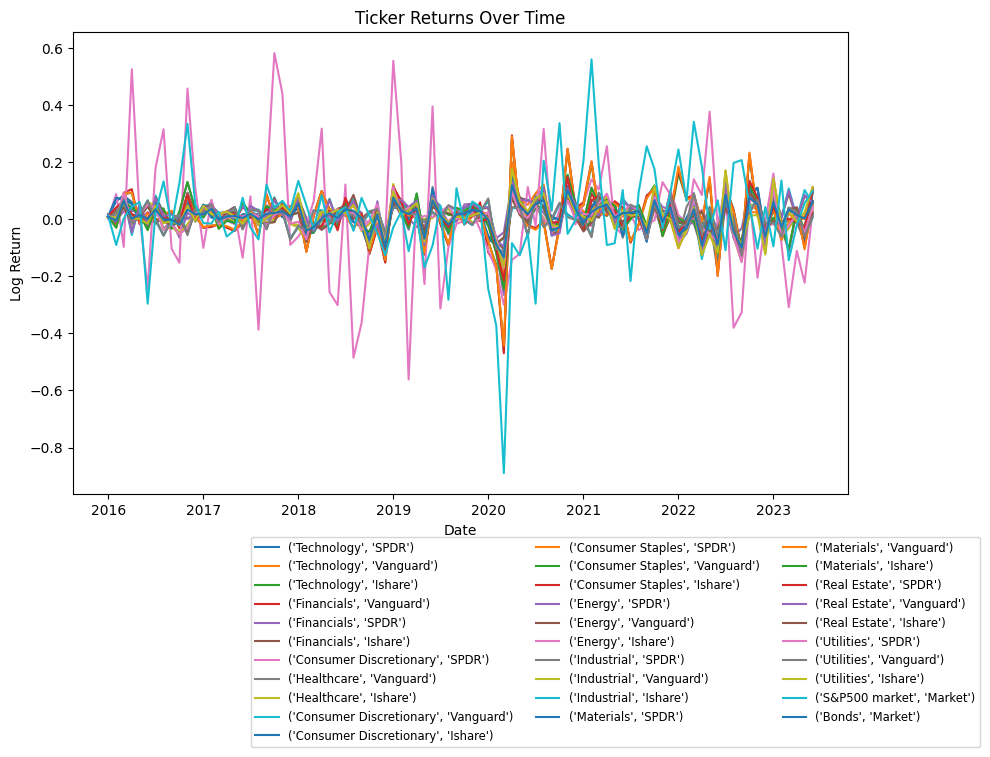

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'transposed_data' is your transposed DataFrame with ticker returns

# Plotting the line graph
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Iterate through each column (ticker) and plot the line
for column in transposed_data.columns:
    plt.plot(transposed_data.index, transposed_data[column], label=column)

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Ticker Returns Over Time')

# Adding a legend to the plot
plt.legend(fontsize="small", loc="upper center", bbox_to_anchor=(0.7, -0.08), ncol=3)

# Displaying the plot
plt.show()

In [ ]:
data1=data.groupby(["Date","Sector"])[["log return"]].mean()
data1.head(30)

log return
Date       Sector                            
2016-01-01 Bonds                     0.009328
           Consumer Discretionary    0.011992
           Consumer Staples          0.008204
           Energy                    0.008913
           Financials                0.009059
           Healthcare                0.007217
           Industrial                0.006962
           Materials                 0.008775
           Real Estate               0.011242
           S&P500 market             0.012697
           Technology                0.007143
           Utilities                 0.007551
2016-02-01 Bonds                    -0.004137
           Consumer Discretionary    0.018935
           Consumer Staples         -0.002843
           Energy                    0.017610
           Financials                0.000144
           Healthcare                0.029571
           Industrial                0.017329
           Materials                 0.005805
           Real Estate               0.012768
           S&P500 market            -0.090080
           Technology                0.001091
           Utilities                 0.009472
2016-03-01 Bonds                     0.063905
           Consumer Discretionary    0.072955
           Consumer Staples          0.066131
           Energy                    0.018473
           Financials                0.055424
           Healthcare                0.083159

In [ ]:
data2=data.groupby(["Date", "Sector"])["log return"].aggregate("mean").unstack()
data2.head()

Sector,Bonds,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrial,Materials,Real Estate,S&P500 market,Technology,Utilities
Date,,,,,,,,,,,,
2016-01-01,0.009328,0.011992,0.008204,0.008913,0.009059,0.007217,0.006962,0.008775,0.011242,0.012697,0.007143,0.007551
2016-02-01,-0.004137,0.018935,-0.002843,0.017610,0.000144,0.029571,0.017329,0.005805,0.012768,-0.090080,0.001091,0.009472
2016-03-01,0.063905,0.072955,0.066131,0.018473,0.055424,0.083159,0.076419,0.074651,0.060987,0.003273,0.070672,0.074028
2016-04-01,0.002696,0.000326,0.034067,0.170939,0.027283,0.028163,-0.003382,0.062328,-0.012785,0.043954,0.023935,-0.008886
2016-05-01,0.015208,0.019147,-0.003456,0.030746,0.017380,0.005089,0.013057,0.001973,0.016772,0.060671,0.002191,0.010844


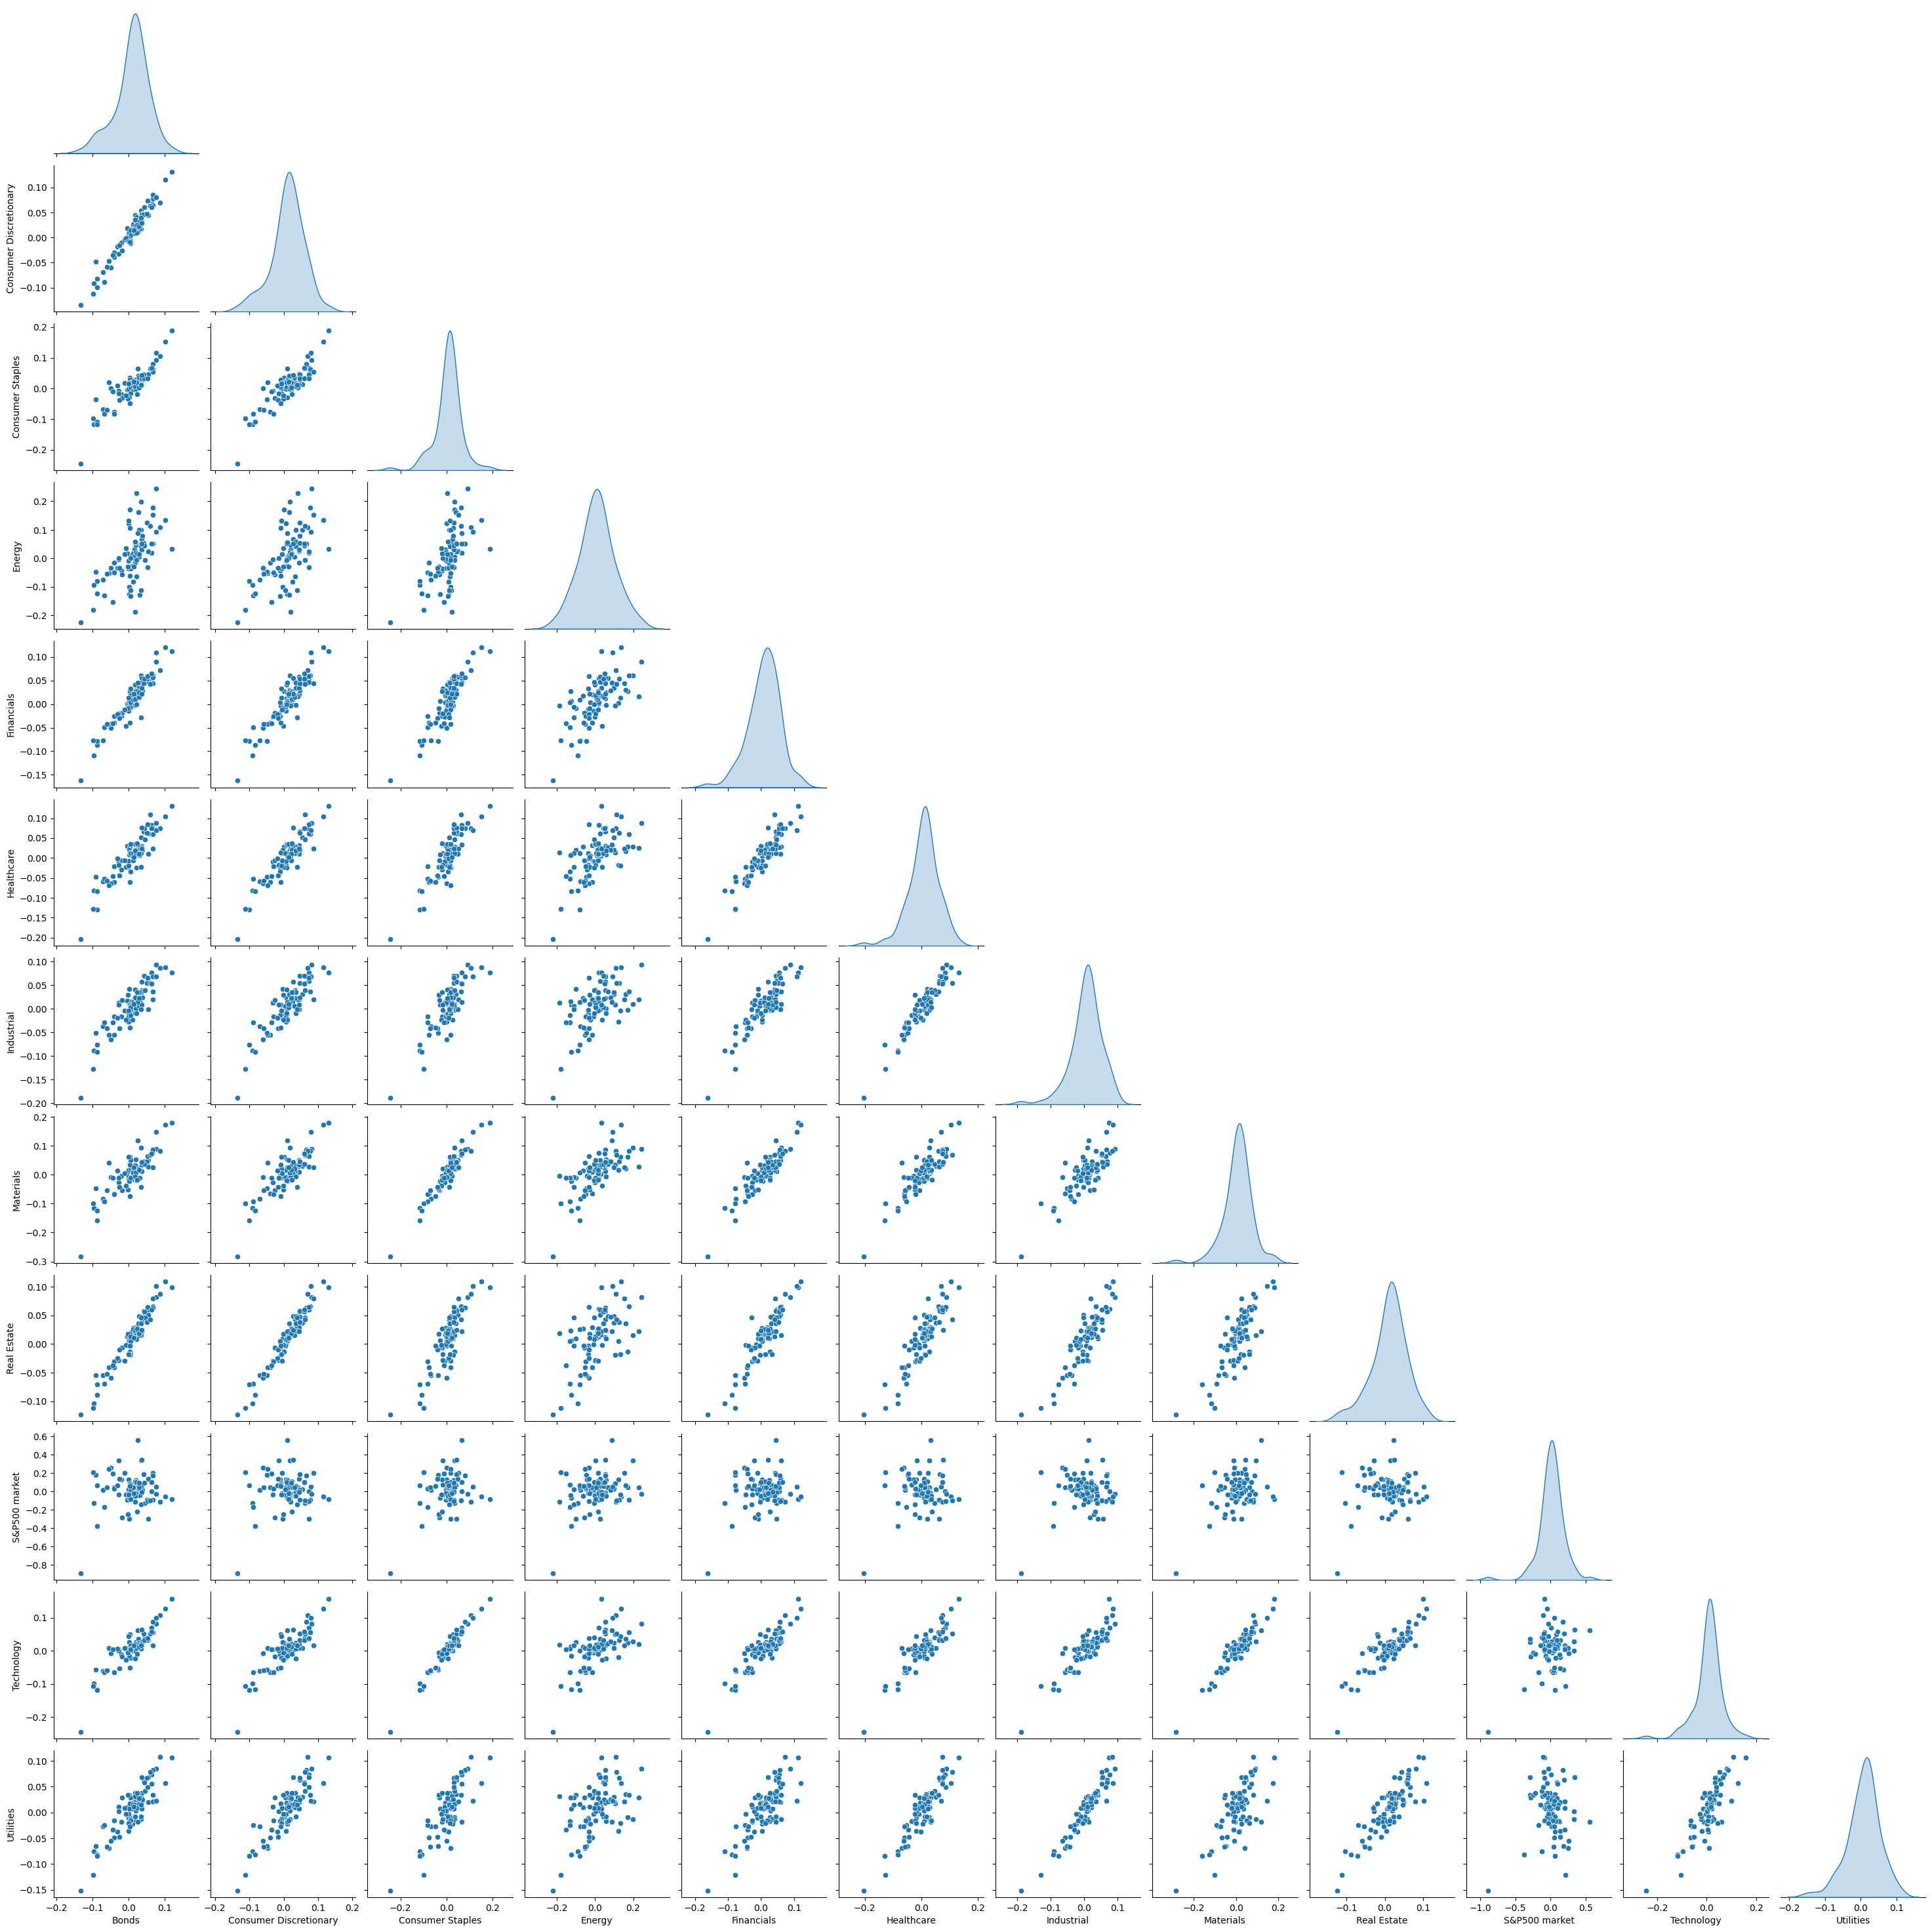

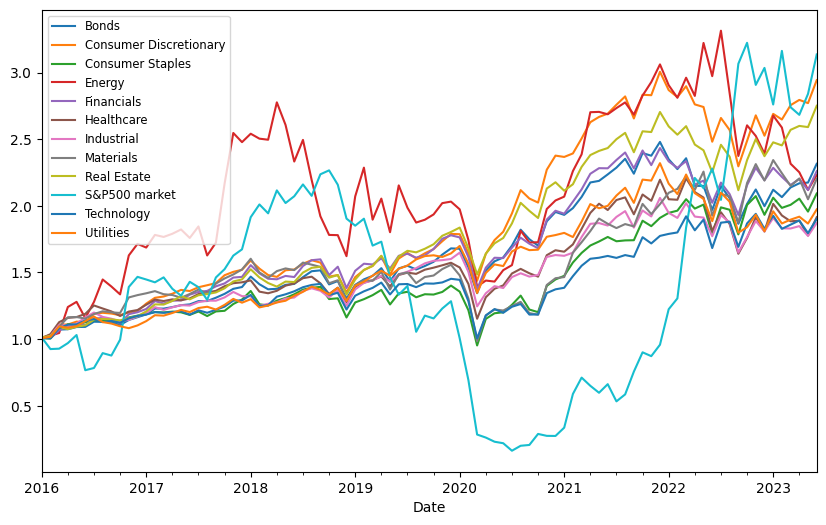

In [ ]:
sectgrap=sns.pairplot(data2, diag_kind="kde", corner=True)
# the dataset is normally distributed
data3=data2.cumsum()
#Plot the cumulative data
data3.apply(np.exp).plot(figsize=(10,6))
plt.legend(fontsize="small")
plt.show()

Sector,Bonds,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrial,Materials,Real Estate,S&P500 market,Technology,Utilities
Sector,,,,,,,,,,,,
Bonds,1.00,0.97,0.90,0.62,0.95,0.91,0.89,0.85,0.97,0.13,0.89,0.88
Consumer Discretionary,0.97,1.00,0.88,0.61,0.92,0.92,0.88,0.83,0.97,0.10,0.86,0.86
Consumer Staples,0.90,0.88,1.00,0.61,0.89,0.88,0.84,0.95,0.86,0.34,0.98,0.79
Energy,0.62,0.61,0.61,1.00,0.66,0.61,0.58,0.67,0.59,0.30,0.60,0.50
Financials,0.95,0.92,0.89,0.66,1.00,0.91,0.89,0.90,0.92,0.22,0.88,0.82
Healthcare,0.91,0.92,0.88,0.61,0.91,1.00,0.95,0.87,0.89,0.15,0.89,0.91
Industrial,0.89,0.88,0.84,0.58,0.89,0.95,1.00,0.80,0.90,0.13,0.89,0.95
Materials,0.85,0.83,0.95,0.67,0.90,0.87,0.80,1.00,0.80,0.41,0.94,0.70
Real Estate,0.97,0.97,0.86,0.59,0.92,0.89,0.90,0.80,1.00,0.09,0.85,0.86


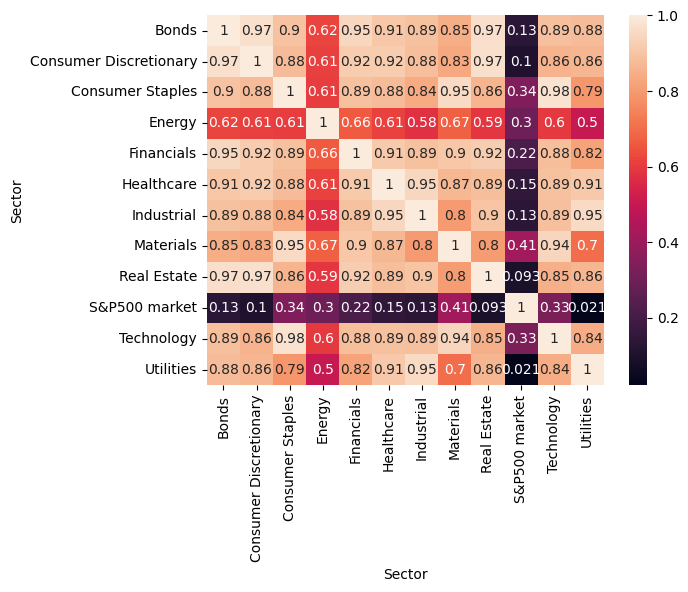

In [ ]:
corr=sns.heatmap(data2.corr(), annot=True)
round(data2.corr(), ndigits=2)

In [ ]:
covid=pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv", index_col="date", parse_dates=True)# Datasetfrom New York Times
covid.head()
covid.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1158 entries, 2020-01-21 to 2023-03-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   1158 non-null   int64
 1   deaths  1158 non-null   int64
dtypes: int64(2)
memory usage: 27.1 KB


In [ ]:
covid.isnull().any()

cases     False
deaths    False
dtype: bool

In [ ]:
covid["case_%change"]=covid["cases"].pct_change()
covid["death_%change"]=covid["deaths"].pct_change()


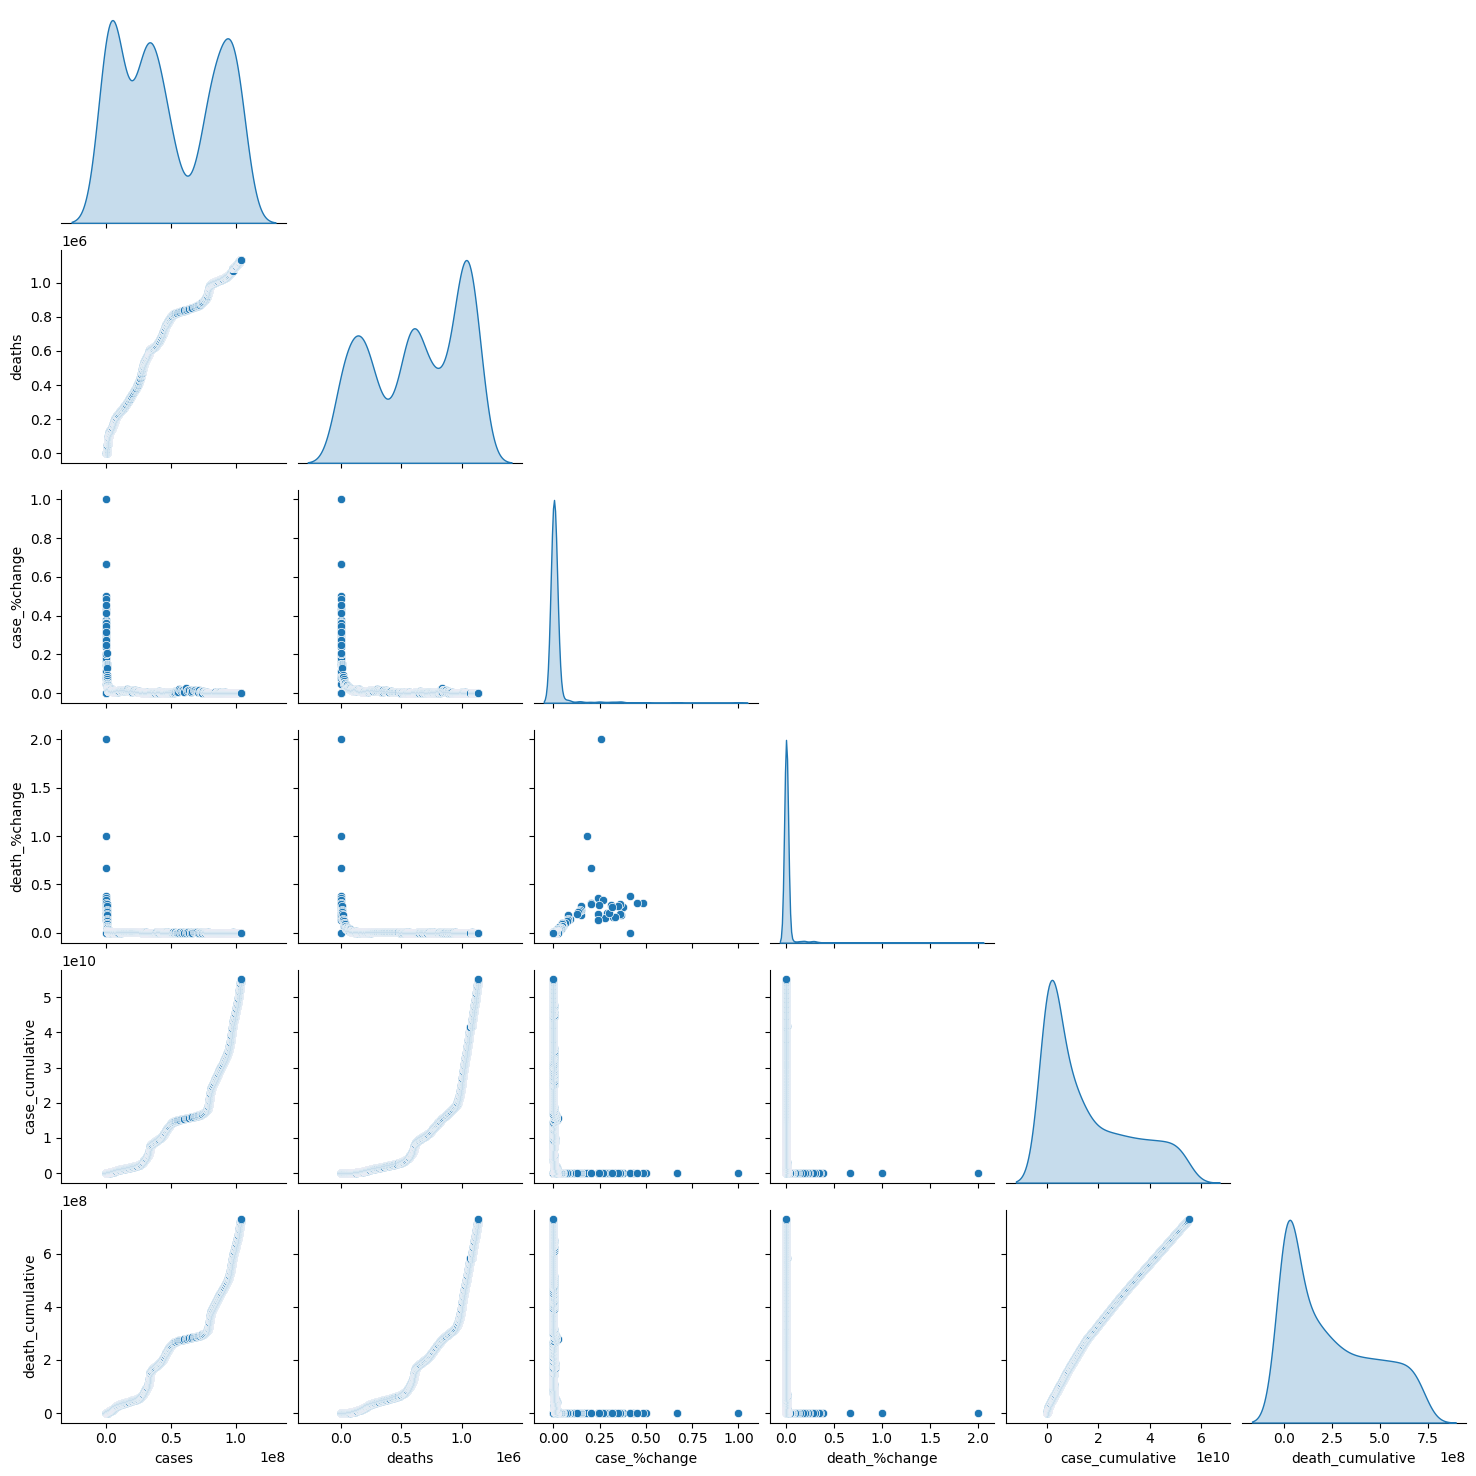

In [ ]:
covid["case_cumulative"]=covid["cases"].cumsum()
covid["death_cumulative"]=covid["deaths"].cumsum()
covid.tail()
grid=sns.pairplot(covid, diag_kind="kde", corner=True)

In [ ]:
covid.head(10)
covide.tail()

,cases,deaths,case_%change,death_%change,case_cumulative,death_cumulative
date,,,,,,
2020-01-21,1,0,NaN,NaN,1,0
2020-01-22,1,0,0.000000,NaN,2,0
2020-01-23,1,0,0.000000,NaN,3,0
2020-01-24,2,0,1.000000,NaN,5,0
2020-01-25,3,0,0.500000,NaN,8,0
2020-01-26,5,0,0.666667,NaN,13,0
2020-01-27,5,0,0.000000,NaN,18,0
2020-01-28,5,0,0.000000,NaN,23,0
2020-01-29,5,0,0.000000,NaN,28,0


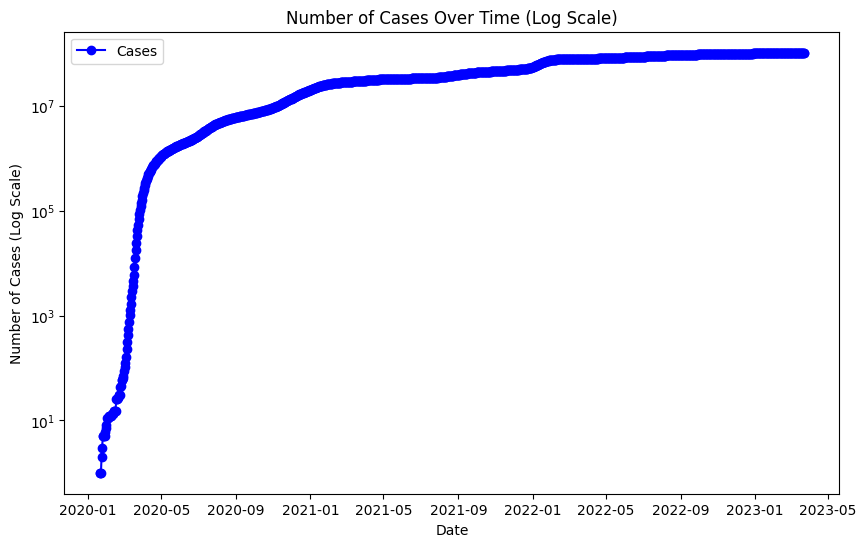

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with columns: date, cases, case_cumulative
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Plotting the data with a logarithmic y-axis
plt.semilogy(covid.index, covid['cases'], marker='o', color='b', label='Cases')

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Number of Cases (Log Scale)')
plt.title('Number of Cases Over Time (Log Scale)')
plt.legend()

# Displaying the plot
plt.show()



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving COVID_Vaccinations_US.csv to COVID_Vaccinations_US.csv


In [ ]:
vaccination = pd.read_csv("COVID_Vaccinations_US.csv", index_col="Date", parse_dates=True)
vaccination=vaccination[["Administered_Dose1_Recip", "Series_Complete_Yes", "Booster_Doses"]]
vacin=vaccination.groupby(vaccination.index).sum()
vacin.describe().round(2)


,Administered_Dose1_Recip,Series_Complete_Yes,Booster_Doses
count,320.0,3.200000e+02,3.200000e+02
mean,241264708.8,2.066787e+08,6.899164e+07
std,22322517.1,1.839384e+07,4.450899e+07
min,77842973.0,6.775881e+07,0.000000e+00
25%,232029485.5,1.968162e+08,0.000000e+00
50%,250316814.0,2.133026e+08,9.285335e+07
75%,255142304.0,2.191303e+08,1.016175e+08
max,266238774.0,2.284605e+08,1.174076e+08


In [ ]:
vacin.head()
vacin.info()
vacin.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2021-09-17 to 2023-05-10
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administered_Dose1_Recip  320 non-null    float64
 1   Series_Complete_Yes       320 non-null    float64
 2   Booster_Doses             320 non-null    float64
dtypes: float64(3)
memory usage: 10.0 KB


Administered_Dose1_Recip    float64
Series_Complete_Yes         float64
Booster_Doses               float64
dtype: object

In [ ]:
vacin.head()

,Administered_Dose1_Recip,Series_Complete_Yes,Booster_Doses
Date,,,
2021-09-17,77842973.0,67758810.0,0.0
2021-09-18,190844217.0,165354624.0,0.0
2021-09-19,190897345.0,165593647.0,0.0
2021-09-20,191113542.0,165966770.0,0.0
2021-09-21,191205542.0,166090540.0,0.0


In [ ]:
#https://www.commerce.gov/news/blog/2022/01/us-population-estimated-332403650-jan-1-2022
# the populations is estimated at 332,403,650
#As our nation prepares to ring in the new year, the U.S. Census Bureau projects the United States population will be 332,403,650 on Jan. 1, 2022.
columns_1=["dose1%", "Complete%", "Booster%"]
vacin[columns_1]=vacin/ 332403650


In [ ]:
vacin.head()

,Administered_Dose1_Recip,Series_Complete_Yes,Booster_Doses,dose1%,Complete%,Booster%
Date,,,,,,
2021-09-17,77842973.0,67758810.0,0.0,0.234182,0.203845,0.0
2021-09-18,190844217.0,165354624.0,0.0,0.574134,0.497451,0.0
2021-09-19,190897345.0,165593647.0,0.0,0.574294,0.498170,0.0
2021-09-20,191113542.0,165966770.0,0.0,0.574944,0.499293,0.0
2021-09-21,191205542.0,166090540.0,0.0,0.575221,0.499665,0.0


In [ ]:
vacin.dtypes

Administered_Dose1_Recip    float64
Series_Complete_Yes         float64
Booster_Doses               float64
dose1%                      float64
Complete%                   float64
Booster%                    float64
dtype: object

In [ ]:
vacin.isnull().any()
vacin.isnull().sum()


Administered_Dose1_Recip    0
Series_Complete_Yes         0
Booster_Doses               0
dose1%                      0
Complete%                   0
Booster%                    0
dtype: int64

In [ ]:
vacin1=vacin.iloc[:,3:]
vacin1.tail(30)

,dose1%,Complete%,Booster%
Date,,,
2022-10-19,0.787640,0.675331,0.332146
2022-10-26,0.788948,0.676343,0.333581
2022-11-02,0.790048,0.677670,0.335466
2022-11-09,0.791904,0.678926,0.337819
2022-11-16,0.795186,0.681351,0.339980
2022-11-23,0.796167,0.682055,0.341115
2022-11-30,0.792669,0.680515,0.342309
2022-12-07,0.793588,0.681221,0.343480
2022-12-14,0.794342,0.681902,0.344617


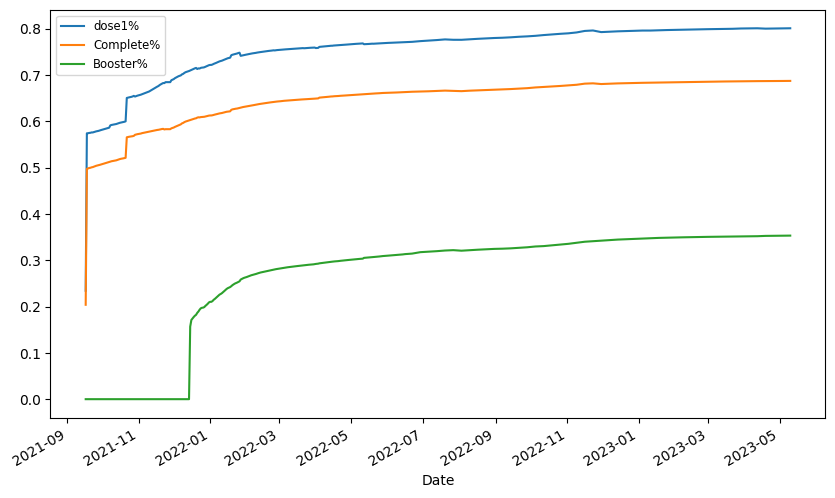

In [ ]:
dat=vacin1
#Plot the cumulative data
dat.plot(figsize=(10,6))
plt.legend(fontsize="small")
plt.show()


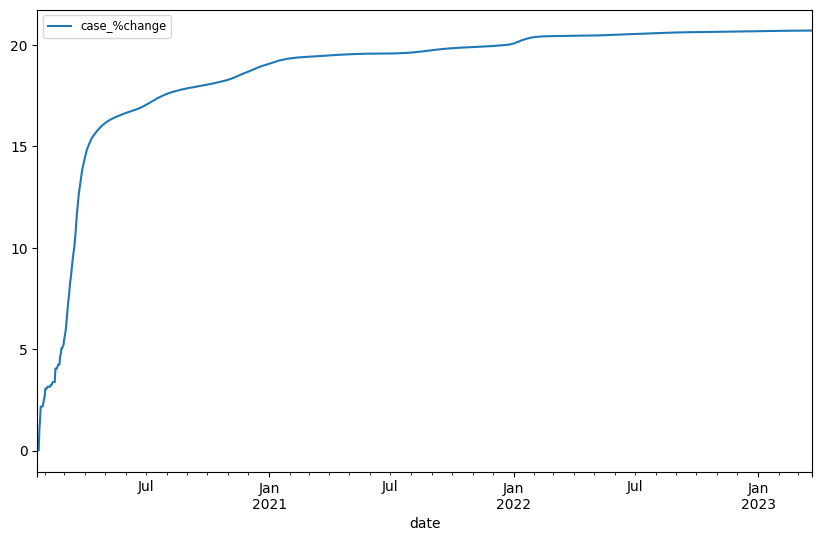

In [ ]:
#Plot the cumulative data
covid['case_%change'].cumsum().plot(figsize=(10,6))
plt.legend(fontsize="small")
plt.show()

In [ ]:
merge_data=pd.merge(data2, covid, left_index=True, right_index=True)

In [ ]:
merge_data.describe()
merge_data.head()
merge_data.tail()

,Bonds,Consumer Discretionary,Consumer Staples,Energy,Financials,Healthcare,Industrial,Materials,Real Estate,S&P500 market,Technology,Utilities,cases,deaths,case_%change,death_%change,case_cumulative,death_cumulative
2022-11-01,0.052358,0.074211,0.032287,-0.030990,0.059085,0.084856,0.065820,0.063232,0.065313,-0.103061,0.037730,0.049389,97262328,1066491,0.000301,0.000320,40791881913,572580097
2022-12-01,-0.060782,-0.058675,-0.070054,-0.054088,-0.042036,-0.057845,-0.042138,-0.054768,-0.052818,0.042907,-0.059456,-0.065832,98613271,1088564,0.000986,0.000635,43729687729,604992430
2023-01-01,0.059921,0.062824,0.064378,0.112783,0.041808,0.108648,0.054421,0.067782,0.042927,-0.094860,0.052174,0.079116,100447989,1099837,-0.000141,0.000000,46816951246,638927998
2023-02-01,-0.026459,-0.015809,-0.037759,-0.034162,-0.030249,-0.044042,-0.041544,-0.043012,-0.009343,0.136002,-0.052391,-0.047642,102179838,1115974,0.001074,0.000873,49962136007,673291642
2023-03-01,0.034451,0.039759,0.011474,-0.110752,-0.027932,-0.023036,-0.000828,-0.043343,0.046495,-0.143452,0.017071,0.015234,103233169,1128090,0.000865,0.000726,52838734789,704713583


In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2020-02-01 to 2023-03-01
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bonds                   38 non-null     float64
 1   Consumer Discretionary  38 non-null     float64
 2   Consumer Staples        38 non-null     float64
 3   Energy                  38 non-null     float64
 4   Financials              38 non-null     float64
 5   Healthcare              38 non-null     float64
 6   Industrial              38 non-null     float64
 7   Materials               38 non-null     float64
 8   Real Estate             38 non-null     float64
 9   S&P500 market           38 non-null     float64
 10  Technology              38 non-null     float64
 11  Utilities               38 non-null     float64
 12  cases                   38 non-null     int64  
 13  deaths                  38 non-null     int64  
 14  case_%change            

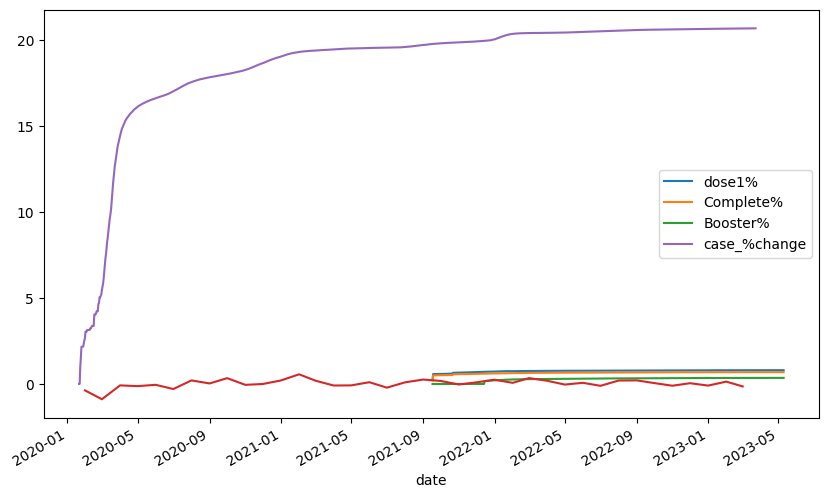

In [ ]:
dat.plot(figsize=(10,6))
plt.plot(merge_data['S&P500 market'])
plt.legend(fontsize="small")
covid['case_%change'].cumsum().plot(figsize=(10,6))
plt.legend()
plt.show()









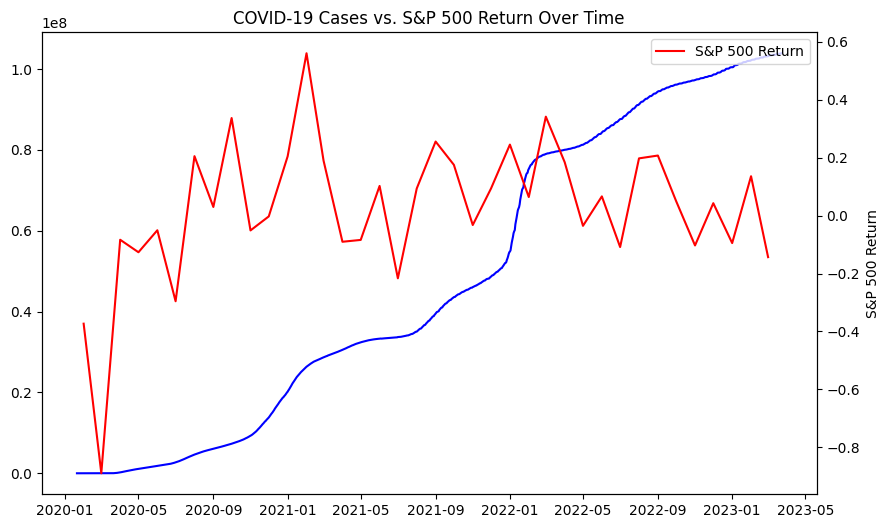

In [ ]:
# Assuming you have two datasets named covid_cases and sp500_return
# covid_cases = pd.read_csv("covid_cases_data.csv", parse_dates=True, index_col="Date")
# sp500_return = pd.read_csv("sp500_return_data.csv", parse_dates=True, index_col="Date")

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot COVID-19 cases against the left y-axis
plt.plot(covid.index, covid['cases'], color='b', label='COVID-19 Cases')

# Create a second y-axis on the right side for S&P 500 return
ax2 = plt.gca().twinx()
ax2.plot(merge_data.index, merge_data['S&P500 market'], color='r', label='S&P 500 Return')

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('COVID-19 Cases')
ax2.set_ylabel('S&P 500 Return')
plt.title('COVID-19 Cases vs. S&P 500 Return Over Time')

# Adding legends for both lines on their respective y-axes
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Displaying the plot
plt.show()

In [ ]:
# regression logistics